<a href="https://colab.research.google.com/github/ManishaLokasani/Manisha_INFO5731_Spring2023/blob/main/In_class_exercise_04_03282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [19]:
# Write your code here

import requests
from bs4 import BeautifulSoup

# URL of the IMDB page for Cocaine Bear
url = "https://www.imdb.com/title/tt14209916/reviews/?ref_=tt_ql_2"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, "html.parser")

# Find all the user reviews on the page
reviews = soup.find_all("div", class_="lister-item-content")

# Print the text of each review
imdb_reviews = []
for review in reviews:
    text = review.find("div", class_="text").text.strip()
    imdb_reviews.append(text)
    print(text)





Ummmmm, where do I begin. I didn't watch any trailers or read any reviews. I saw the poster and title and thought, "I'm definitely watching that." After seeing it, I can say with confidence that it's exactly what a movie named Cocaine Bear should be.Aside from being an extremely fun and outrageous thriller, this movie is hysterical. I was full-volume laughing frequently. So many parts are the perfect combination of memorable and hilarious. It knows exactly what it's doing.The other thing that made me happy is seeing a studio have the courage to allow the filmmakers to go all out. I compare it to M3gan which was going for a similar tone. But M3gan was toned down to PG-13 so teens could watch. Cocaine Bear is rated R as it absolutely should be. It's not gratuitous but it never feels like it's holding back.I had a blast with this movie. If the title or premise intrigue you, you will most likely be pleased. (1 viewing, opening Thursday 2/23/2023)
Cocaine Bear promised so much but just didn

In [20]:
df = pd.DataFrame({'user_reviews': imdb_reviews})

#save the dataframe on a csv file
df.to_csv('user_reviews.csv')
df.head()


,user_reviews
0,"Ummmmm, where do I begin. I didn't watch any t..."
1,Cocaine Bear promised so much but just didn't ...
2,I first groaned and rolled my eyes when I hear...
3,If you go down to the woods today you're sure ...
4,This film is exactly what you think it is. It'...


In [21]:
import nltk
nltk.download('stopwords')
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [22]:
!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [49]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
data_word = df.user_reviews.tolist()
data_word


['Ummmmm, I begin. I watch trailers read reviews. I saw poster title thought, "I\'m definitely watching that." After seeing it, I say confidence exactly movie named Cocaine Bear be.Aside extremely fun outrageous thriller, movie hysterical. I full-volume laughing frequently. So many parts perfect combination memorable hilarious. It knows exactly doing.The thing made happy seeing studio courage allow filmmakers go out. I compare M3gan going similar tone. But M3gan toned PG-13 teens could watch. Cocaine Bear rated R absolutely be. It\'s gratuitous never feels like holding back.I blast movie. If title premise intrigue you, likely pleased. (1 viewing, opening Thursday 2/23/2023)',
 'Cocaine Bear promised much hit spot me.There many characters opinion becomes bit chore breaks things little much. If focus couple characters protagonists would better.The humour always work me. Sometimes good fell flat little often.The central premise great go far enough opinion. I feel like lot fun concept. Alt

In [53]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_word, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_word], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])





[['begin', 'watch', 'trailer', 'read', 'review', 'see', 'poster', 'title', 'think', 'definitely', 'watch', 'see', 'say', 'confidence', 'exactly', 'movie', 'name', 'cocaine', 'extremely', 'fun', 'outrageous', 'thriller', 'movie', 'hysterical', 'full', 'volume', 'laugh', 'frequently', 'many', 'part', 'perfect', 'combination', 'memorable', 'hilarious', 'know', 'exactly', 'thing', 'make', 'happy', 'see', 'studio', 'courage', 'allow', 'filmmaker', 'go', 'compare', 'go', 'similar', 'tone', 'tone', 'teen', 'watch', 'cocaine', 'rate', 'absolutely', 'gratuitous', 'never', 'feel', 'hold', 'blast', 'movie', 'title', 'premise', 'intrigue', 'likely', 'pleased', 'view', 'opening', 'thursday']]


In [56]:

id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print (corpus[:1])
[[(id2word[i], f) for i, f in c] for c in corpus[:1]]


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 1), (57, 3)]]


[[('absolutely', 1),
  ('allow', 1),
  ('begin', 1),
  ('blast', 1),
  ('cocaine', 2),
  ('combination', 1),
  ('compare', 1),
  ('confidence', 1),
  ('courage', 1),
  ('definitely', 1),
  ('exactly', 2),
  ('extremely', 1),
  ('feel', 1),
  ('filmmaker', 1),
  ('frequently', 1),
  ('full', 1),
  ('fun', 1),
  ('go', 2),
  ('gratuitous', 1),
  ('happy', 1),
  ('hilarious', 1),
  ('hold', 1),
  ('hysterical', 1),
  ('intrigue', 1),
  ('know', 1),
  ('laugh', 1),
  ('likely', 1),
  ('make', 1),
  ('many', 1),
  ('memorable', 1),
  ('movie', 3),
  ('name', 1),
  ('never', 1),
  ('opening', 1),
  ('outrageous', 1),
  ('part', 1),
  ('perfect', 1),
  ('pleased', 1),
  ('poster', 1),
  ('premise', 1),
  ('rate', 1),
  ('read', 1),
  ('review', 1),
  ('say', 1),
  ('see', 3),
  ('similar', 1),
  ('studio', 1),
  ('teen', 1),
  ('thing', 1),
  ('think', 1),
  ('thriller', 1),
  ('thursday', 1),
  ('title', 2),
  ('tone', 2),
  ('trailer', 1),
  ('view', 1),
  ('volume', 1),
  ('watch', 3)]]

In [57]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"movie" + 0.026*"go" + 0.020*"make" + 0.013*"cocaine" + 0.013*"get" + '
  '0.013*"good" + 0.013*"bad" + 0.013*"come" + 0.013*"hell" + 0.013*"almost"'),
 (1,
  '0.054*"movie" + 0.027*"bear" + 0.027*"want" + 0.027*"story" + '
  '0.018*"cocaine" + 0.018*"get" + 0.018*"go" + 0.018*"make" + 0.018*"watch" + '
  '0.018*"trailer"'),
 (2,
  '0.022*"film" + 0.022*"see" + 0.022*"story" + 0.021*"kill" + 0.015*"lot" + '
  '0.015*"kid" + 0.015*"half" + 0.015*"arc" + 0.015*"need" + 0.015*"much"'),
 (3,
  '0.036*"film" + 0.021*"make" + 0.021*"bear" + 0.014*"cocaine" + 0.014*"fun" '
  '+ 0.014*"give" + 0.014*"funny" + 0.014*"hear" + 0.014*"find" + '
  '0.014*"actual"'),
 (4,
  '0.001*"cocaine" + 0.001*"bear" + 0.001*"expect" + 0.001*"much" + '
  '0.001*"film" + 0.001*"make" + 0.001*"think" + 0.001*"movie" + '
  '0.001*"actually" + 0.001*"become"'),
 (5,
  '0.041*"movie" + 0.022*"make" + 0.022*"film" + 0.018*"really" + '
  '0.018*"horror" + 0.015*"scene" + 0.015*"fun" + 0.015*"funny" + 0.0

In [65]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.48467131941924524


In [72]:
# calculating model coherence value for various number of topics to get the best k number
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
start, limit, step=2, 20, 2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
for m, cv in zip(range(start, limit, step), coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2981
Num Topics = 4  has Coherence Value of 0.3607
Num Topics = 6  has Coherence Value of 0.3353
Num Topics = 8  has Coherence Value of 0.3951
Num Topics = 10  has Coherence Value of 0.3411
Num Topics = 12  has Coherence Value of 0.4287
Num Topics = 14  has Coherence Value of 0.4257
Num Topics = 16  has Coherence Value of 0.3977
Num Topics = 18  has Coherence Value of 0.455


In [74]:
sum(coherence_values)/len(coherence_values)

0.3819115018506132

In [75]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


[(0,
  '0.020*"movie" + 0.015*"go" + 0.015*"first" + 0.015*"half" + 0.010*"get" + '
  '0.010*"good" + 0.010*"feel" + 0.010*"story" + 0.010*"need" + 0.010*"well"'),
 (1,
  '0.030*"movie" + 0.026*"trailer" + 0.017*"bear" + 0.013*"want" + '
  '0.013*"time" + 0.013*"story" + 0.013*"see" + 0.009*"get" + 0.009*"cocaine" '
  '+ 0.009*"make"'),
 (2,
  '0.021*"film" + 0.021*"expect" + 0.016*"fun" + 0.016*"bear" + '
  '0.013*"cocaine" + 0.013*"time" + 0.013*"character" + 0.013*"get" + '
  '0.011*"much" + 0.008*"movie"'),
 (3,
  '0.021*"cocaine" + 0.019*"make" + 0.015*"film" + 0.015*"bear" + '
  '0.011*"actually" + 0.011*"fun" + 0.009*"find" + 0.009*"attempt" + '
  '0.009*"funny" + 0.009*"movie"'),
 (4,
  '0.014*"get" + 0.014*"time" + 0.014*"see" + 0.014*"really" + 0.007*"movie" + '
  '0.007*"good" + 0.007*"bad" + 0.007*"much" + 0.007*"set" + 0.007*"stuff"'),
 (5,
  '0.045*"movie" + 0.014*"get" + 0.014*"film" + 0.014*"character" + '
  '0.013*"bear" + 0.013*"cocaine" + 0.012*"make" + 0.011*"good" 

In [77]:
#import pyLDAvis.gensim

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [122]:
# Write your code here
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

# Coherence score in topic modeling to measure how interpretable the topics are to humans.
# find the coherence score with a different number of topics
for i in range(1,16):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))





Coherence score with 1 clusters: 0.26309777663819534
Coherence score with 2 clusters: 0.5158287427763532
Coherence score with 3 clusters: 0.5455809060912721
Coherence score with 4 clusters: 0.4995213981370341
Coherence score with 5 clusters: 0.43866608710378313
Coherence score with 6 clusters: 0.5406218565251717
Coherence score with 7 clusters: 0.5348111237985783
Coherence score with 8 clusters: 0.4377943185065078
Coherence score with 9 clusters: 0.4536003203178468
Coherence score with 10 clusters: 0.43770368416643235
Coherence score with 11 clusters: 0.44181816070173974
Coherence score with 12 clusters: 0.40223543951223223
Coherence score with 13 clusters: 0.40081219948056024
Coherence score with 14 clusters: 0.38917300482179923
Coherence score with 15 clusters: 0.4322085389445897


In [123]:
# perform SVD on the bag of words with the LsiModel to extract 2 topics
lsi = LsiModel(bow, num_topics=2, id2word=dictionary)

In [126]:
for topic_num, words in lsi.print_topics(num_words=20):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.478*"movi" + 0.468*"bear" + 0.308*"cocain" + 0.220*"film" + 0.162*"charact" + 0.153*"time" + 0.146*"fun" + 0.143*"good" + 0.123*"expect" + 0.117*"funni" + 0.105*"like" + 0.100*"that" + 0.098*"scene" + 0.091*"look" + 0.090*"watch" + 0.087*"comedi" + 0.084*"think" + 0.080*"cast" + 0.076*"stori" + 0.075*"actual".
Words in 1: -0.585*"movi" + 0.311*"film" + 0.297*"bear" + 0.162*"actual" + 0.126*"time" + -0.125*"like" + 0.112*"cocain" + 0.110*"fun" + 0.102*"the" + -0.101*"need" + -0.097*"nice" + 0.095*"and" + 0.093*"expect" + 0.085*"learn" + -0.085*"look" + 0.085*"truli" + -0.077*"problem" + -0.077*"instead" + 0.073*"cgi" + 0.068*"what".


In [125]:
corpus_lsi = lsi[bow]
score1 = []
score2 = []
for doc in corpus_lsi:
    score1.append(round(doc[0][1],2))
    score2.append(round(doc[1][1],2))

# create data frame that shows scores assigned for both topics for each review
df_topic = pd.DataFrame()
df_topic['Text'] = df['user_reviews']
df_topic['Topic 0 score'] = score1
df_topic['Topic 1 score'] = score2
df_topic['Topic']= df_topic[['Topic 0 score', 'Topic 1 score']].apply(lambda x: x.argmax(), axis=1)
df_topic.head(1)

,Text,Topic 0 score,Topic 1 score,Topic
0,"Ummmmm, I begin. I watch trailers read reviews...",4.7,-1.13,0


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [138]:
# Write your code here


nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:

top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(df.user_reviews.tolist()):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [df.user_reviews.tolist()[i].strip()[:35] for i in top]
    msg += 'has stop words '.join(top_words)
    print (msg)
    topic_to_topwords[j] = top_words


Topic 0 Ummmmm, I begin. I watch trailers r
Topic 1 Ummmmm, I begin. I watch trailers r
Topic 2 Ummmmm, I begin. I watch trailers r
Topic 3 Ummmmm, I begin. I watch trailers r
Topic 4 Ummmmm, I begin. I watch trailers r
Topic 5 Ummmmm, I begin. I watch trailers r
Topic 6 Ummmmm, I begin. I watch trailers r
Topic 7 Ummmmm, I begin. I watch trailers r
Topic 8 Ummmmm, I begin. I watch trailers r
Topic 9 Ummmmm, I begin. I watch trailers r
Topic 10 Ummmmm, I begin. I watch trailers r
Topic 11 Ummmmm, I begin. I watch trailers r
Topic 12 Ummmmm, I begin. I watch trailers r
Topic 13 Ummmmm, I begin. I watch trailers r
Topic 14 Ummmmm, I begin. I watch trailers r
Topic 15 Ummmmm, I begin. I watch trailers r
Topic 16 Ummmmm, I begin. I watch trailers r
Topic 17 Ummmmm, I begin. I watch trailers r
Topic 18 Ummmmm, I begin. I watch trailers r
Topic 19 Ummmmm, I begin. I watch trailers r
Topic 20 Ummmmm, I begin. I watch trailers r
Topic 21 Ummmmm, I begin. I watch trailers r
Topic 22 Ummmmm, I b

<BarContainer object of 20 artists>

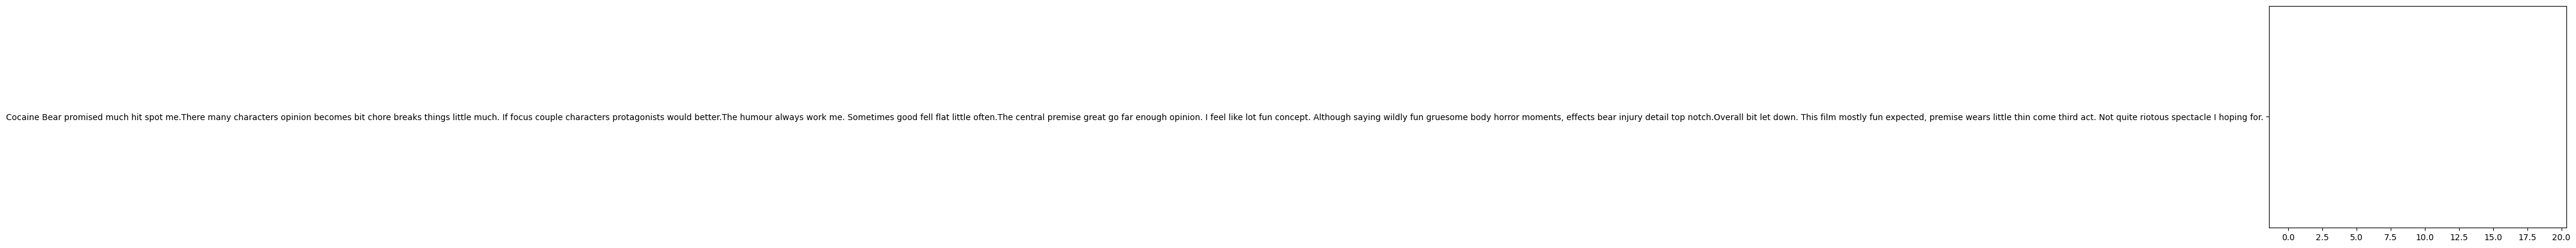

In [147]:
plt.bar(np.arange(20), df.user_reviews.tolist()[1])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [90]:
# Write your code here

!pip install bertopic




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bertopic-0.14.1-py2.py3-none-any.whl (120 kB)
  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Preparing metadata (setup.py) ... done
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached transformers-4.27.4-py3-none-any.whl (6.8 MB)
  Using cached sentencepiece-0.1.97-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached huggingface_hub-0.13.3-py3-none-any.whl (199 kB)
  Using cached pynndescent-0.5.8.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached tokenizers-0.13.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp3

In [93]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df.user_reviews.tolist())
freq = topic_model.get_topic_info(); freq.head(5)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-04-02 22:37:46,587 - BERTopic - Transformed documents to Embeddings
2023-04-02 22:37:57,728 - BERTopic - Reduced dimensionality
2023-04-02 22:37:57,746 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name
0,-1,25,-1_bear_movie_cocaine_film


In [95]:
topic_model.get_topic(-1)

[('bear', 0.09260303821571728),
 ('movie', 0.08619443113248675),
 ('cocaine', 0.06305171811658217),
 ('film', 0.05280987226573848),
 ('the', 0.051479010596103894),
 ('it', 0.043214951283848495),
 ('fun', 0.04178616970481768),
 ('good', 0.03887870848463631),
 ('funny', 0.0358992903826459),
 ('characters', 0.032840192826259454)]

In [103]:
topic_model.visualize_term_rank()

In [109]:
topic_model.update_topics(df.user_reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [28]:
# Write your answer here (no code needed for this question)



